In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import researchpy as rp

In [9]:
# Load the dataset and create a DataFrame
df = pd.read_csv(r'Assignment2.csv')

# Display the data
print(df)

           StartDate           EndDate         Status  Progress  \
0         Start Date          End Date  Response Type  Progress   
1     5/11/2023 7:08    5/11/2023 7:39              0       100   
2     5/11/2023 9:06    5/11/2023 9:33              0       100   
3     5/22/2023 4:44    5/22/2023 5:05              0       100   
4     5/22/2023 9:20   5/22/2023 10:07              0       100   
5     5/23/2023 3:04    5/23/2023 3:31              0       100   
6     5/23/2023 4:14    5/23/2023 4:28              0       100   
7     5/23/2023 5:03    5/23/2023 5:26              0       100   
8     5/23/2023 6:24    5/23/2023 6:45              0       100   
9     5/24/2023 5:01    5/24/2023 5:23              0       100   
10    5/25/2023 8:34    5/25/2023 9:51              0       100   
11   5/25/2023 10:24   5/25/2023 11:13              0       100   
12    5/30/2023 6:18    5/30/2023 6:30              0       100   
13    5/30/2023 7:30    5/30/2023 7:54              0       10

In [10]:
 # Check what is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 122 entries, StartDate to Q8
dtypes: object(122)
memory usage: 34.4+ KB


In [11]:
# Check for missing values in the DataFrame
df.isna().sum()

StartDate                 0
EndDate                   0
Status                    0
Progress                  0
Duration (in seconds)     0
                         ..
Q127                      5
Q128                      6
Q128_6_TEXT              23
Q129                      5
Q8                       35
Length: 122, dtype: int64

In [12]:
# Replace missing values with 'N/A' throughout the DataFrame
df = df.fillna('0')

In [13]:
# Check for missing values in the DataFrame
df.isna().sum()

StartDate                0
EndDate                  0
Status                   0
Progress                 0
Duration (in seconds)    0
                        ..
Q127                     0
Q128                     0
Q128_6_TEXT              0
Q129                     0
Q8                       0
Length: 122, dtype: int64

In [14]:
# Create dataframes for each of the topics
data_and_model = ["Q28", "Q29", "Q80", "Q32", "Q33", "Q79", "Q35", "Q36", "Q37", "Q78", "Q39", "Q77", "Q41", "Q42", "Q75", "Q76", "Q45", "Q46", "Q47", "Q48", "Q74", "Q50", "Q51", "Q73", "Q53", "Q71", "Q55", "Q70"]
technical_documentation = ["Q58", "Q69", "Q68", "Q61", "Q62", "Q63", "Q67", "Q66", "Q82", "Q83", "Q84", "Q85", "Q86", "Q87", "Q88", "Q89", "Q90"]
user_application = ["Q91", "Q93", "Q94", "Q95", "Q96", "Q97", "Q98", "Q100", "Q99"]
model_monitoring = ["Q102", "Q103", "Q106", "Q104", "Q105", "Q108", "Q107", "Q109", "Q110", "Q111"]
risk_management = ["Q118", "Q119", "Q120", "Q121", "Q122", "Q123", "Q124", "Q125", "Q126", "Q127", "Q128", "Q129"]

# Create DataFrames for each topic
df_data_and_model = df[data_and_model]
df_technical_documentation = df[technical_documentation]
df_user_application = df[user_application]
df_model_monitoring = df[model_monitoring]
df_risk_management = df[risk_management]

In [15]:
# Define feeling and activity categories
feeling = ["Q80", "Q79", "Q75", "Q76", "Q45", "Q74", "Q73", "Q71", "Q70", "Q69", "Q68", "Q62", "Q63", "Q67", "Q66", "Q86", "Q87", "Q90", "Q94", "Q97", "Q99", "Q106", "Q110", "Q111", "Q120", "Q122", "Q126", "Q129"]
activity = ["Q28", "Q29", "Q32", "Q33", "Q35", "Q36", "Q37", "Q39", "Q41", "Q42", "Q46", "Q47", "Q48", "Q50", "Q51", "Q53", "Q55", "Q58", "Q61", "Q83", "Q84", "Q85", "Q88", "Q89", "Q91", "Q93", "Q95", "Q98", "Q100", "Q102", "Q103", "Q104", "Q105", "Q108", "Q107", "Q109", "Q118", "Q119", "Q121", "Q123", "Q124", "Q125", "Q127", "Q128"]

# Update the 'Category' column based on the question lists
# Set the default value
df.loc[:, 'Category'] = 'activity'
df.loc[:, 'Category'] = 'feeling'

In [16]:
# Check the data
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q123,Q124,Q125,Q126,Q127,Q128,Q128_6_TEXT,Q129,Q8,Category
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,How often does your organization take a correc...,How often do you test that a corrective action...,How often are flagged risks actually mitigated?,My organization coordinates risk mitigation ac...,How often are risks of the system communicated...,With which stakeholders are risks of the syste...,With which stakeholders are risks of the syste...,My organization communicates risks of the syst...,Does your organization intent to use AI/ML in ...,feeling
1,5/11/2023 7:08,5/11/2023 7:39,0,100,1839,1,5/11/2023 7:39,R_3QJMMTA24YX2yVg,anonymous,EN,...,1,1,1,4,1,3,0,4,0,feeling
2,5/11/2023 9:06,5/11/2023 9:33,0,100,1629,1,5/11/2023 9:33,R_31hoIANMOQfACE2,anonymous,EN,...,1,1,1,3,2,"1,3,4,6",management,4,0,feeling
3,5/22/2023 4:44,5/22/2023 5:05,0,100,1264,1,5/22/2023 5:05,R_e9XbZplwgOLxZbX,anonymous,EN,...,1,1,1,2,2,"1,2,3,4",0,5,0,feeling
4,5/22/2023 9:20,5/22/2023 10:07,0,100,2820,1,5/22/2023 10:07,R_1KwOOSISIYqCkoY,anonymous,EN,...,1,1,2,4,2,6,Everyone for which is relevant.,5,0,feeling


In [17]:
# Create grading dictionary
grading_dictionary = {
    "Q28": {
        "0": 0,  # no answer
        "1": 0,  # first answer possibility
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # last answer possibility
    },
    "Q37": {
        "0": 0,  # no answer
        "1": 0,  # first answer possibility
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # last answer possibility
    },
    "Q29": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q32": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q33": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q36": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q46": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q47": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q50": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q51": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q58": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q84": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q93": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q95": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q96": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q98": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q105": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q108": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q107": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q121": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q123": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q124": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q127": {
        "0": 0,  # no answer
        "1": 1,  # in almost every project
        "2": 0.67,  # often
        "3": 0.33,  # seldom
        "4": 0,  # never happened
    },
    "Q80": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q79": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q78": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q77": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q75": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q76": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q74": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q73": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q71": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q70": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q69": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q68": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q67": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q66": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q87": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q90": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q94": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q97": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q99": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q104": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q110": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
     "Q111": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q122": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q126": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
    "Q129": {
        "0": 0,  # no answer
        "1": 0,  # strongly disagree
        "2": 0.25,
        "3": 0.5,
        "4": 0.75,
        "5": 1,  # strongly agree
    },
     "Q35":{
        "0": 1, #no (best outcome)
        "1": 0.5, #yes
        "2": 0, #not sure
        "3": 0, #no answer
     },
    "Q39": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q42": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q48": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q53": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q61": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q85": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q91": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
    "Q128": {
        "0": 0,  # no answer
        "1": 0.2,  # for each answer 0.2 added
        "2": 0.2,
        "3": 0.2,
        "4": 0.2,
        "5": 0.2,
    },
     "Q41":{
         "0": 0, #no answer
         "1": 1, #best outcome (combination of 2 & 3)
         "2": 0.5, #equal answer value
         "3": 0.5, #equal answer value
         "4": 0, #worst outcome
     },
      "Q45":{
         "1": 1, #yes
         "2": 0.5, #somewhat
         "3": 0, #no
         "4": 0, #no answer
     },
     "Q118":{
         "1": 1, #yes
         "2": 0.5, #somewhat
         "3": 0, #no
         "4": 0, #no answer
     },
    "Q120":{
         "1": 1, #yes
         "2": 0.5, #somewhat
         "3": 0, #no
         "4": 0, #no answer
     },
     "Q55": {
         "0": 0, #no answer
         "1": 1, #For every model
         "2": 0.67, #around every quarter of the year
         "3": 0.33, #once a year
         "4": 0, #never happend
     },
     "Q62": {
         "0": 0, #no answer
         "1": 1, #yes
         "2": 0, #no
         "3": 0.5, #sometimes
     },
     "Q63": {
         "0": 0, #no answer
         "1": 1, #yes
         "2": 0, #no
     },
     "Q86": {
         "0": 0, #no answer
         "1": 1, #yes
         "2": 0, #no
     },
     "Q106": {
         "0": 0, #no answer
         "1": 1, #yes
         "2": 0, #no
     },
     "Q82": {
         "0": 0, #no ansewer
         "1": 1, # "best"
         "2": 0.6,
         "3": 0.8,
         "4": 0.4,
         "5": 0.2,
         "6": 0, # "worst"
     },
     "Q89": {
         "0": 0, #no ansewer
         "1": 1, # "best"
         "2": 0.6,
         "3": 0.8,
         "4": 0.4,
         "5": 0.2,
         "6": 0, # "worst"
     },
     "Q83": {
         "0": 0, #no answer
         "1": 1, # "best"
         "2": 0.75,
         "3": 0.5,
         "4": 0.25,
         "5": 0, # "worst"
     },
     "Q102": {
         "0": 0, #no answer
         "1": 1, # "best"
         "2": 0.75,
         "3": 0.5,
         "4": 0.25,
         "5": 0, # "worst"
     },
     "Q125": {
         "0": 0, #no answer
         "1": 1, # "best"
         "2": 0.75,
         "3": 0.5,
         "4": 0.25,
         "5": 0, # "worst"
     },
     "Q88": {
         "0": 0, #no ansewer
         "1": 0.5, # #during a project
         "2": 0.5, # fixed guidelines
         "3": 0, #no fixed guidelines
     },
     "Q100": {
         "0": 0, #no answer
         "1": 0.33, #once per project
         "2": 1, #multiple timer per project
         "3": 0.67, #sporadically
         "4": 0, #not performed
     },
     "Q103": {
         "0": 0, #no ansewer
         "1": 0.33, #equal answer value
         "2": 0.33, #equal answer value
         "3": 0.33, #equal answer value
         "4": 0, # "Worst"
     },
     "Q109": {
         "0": 0, #no ansewer
         "1": 0.33, #equal answer value
         "2": 0.33, #equal answer value
         "3": 0, # "worst"
         "4": 0.33, #equal answer value
     },
     "Q119": {
         "0": 0, #no ansewer
         "1": 0.25, #equal answer value
         "2": 0.25, #equal answer value
         "3": 0.25, #equal answer value
         "4": 0.25, #equal answer value
     }
}

In [18]:
# Check grading dictionary
print(grading_dictionary)

{'Q28': {'0': 0, '1': 0, '2': 0.25, '3': 0.5, '4': 0.75, '5': 1}, 'Q37': {'0': 0, '1': 0, '2': 0.25, '3': 0.5, '4': 0.75, '5': 1}, 'Q29': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q32': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q33': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q36': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q46': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q47': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q50': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q51': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q58': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q84': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q93': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q95': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q96': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q98': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q105': {'0': 0, '1': 1, '2': 0.67, '3': 0.33, '4': 0}, 'Q108': {'0': 0, '1': 1, '2': 0.67, '3': 0.

In [19]:
# Transform dictionary into data frame
df2 = pd.DataFrame(grading_dictionary)

In [20]:
# Define feeling and activity categories
feeling = ["Q80", "Q79", "Q75", "Q76", "Q45", "Q74", "Q73", "Q71", "Q70", "Q69", "Q68", "Q62", "Q63", "Q67", "Q66", "Q86", "Q87", "Q90", "Q94", "Q97", "Q99", "Q106", "Q110", "Q111", "Q120", "Q122", "Q126", "Q129"]
activity = ["Q28", "Q29", "Q32", "Q33", "Q35", "Q36", "Q37", "Q39", "Q41", "Q42", "Q46", "Q47", "Q48", "Q50", "Q51", "Q53", "Q55", "Q58", "Q61", "Q83", "Q84", "Q85", "Q88", "Q89", "Q91", "Q93", "Q95", "Q98", "Q100", "Q102", "Q103", "Q104", "Q105", "Q108", "Q107", "Q109", "Q118", "Q119", "Q121", "Q123", "Q124", "Q125", "Q127", "Q128"]

In [21]:
# Create dataframes for each of the topics, what could be the foreign key - question nr. but its not really a column/row?
data_and_model = ["Q28", "Q29", "Q80", "Q32", "Q33", "Q79", "Q35", "Q36", "Q37", "Q78", "Q39", "Q77", "Q41", "Q42", "Q75", "Q76", "Q45", "Q46", "Q47", "Q48", "Q74", "Q50", "Q51", "Q73", "Q53", "Q71", "Q55", "Q70"]
technical_documentation = ["Q58", "Q69", "Q68", "Q61", "Q62", "Q63", "Q67", "Q66", "Q82", "Q83", "Q84", "Q85", "Q86", "Q87", "Q88", "Q89", "Q90"]
user_application = ["Q91", "Q93", "Q94", "Q95", "Q96", "Q97", "Q98", "Q100", "Q99"]
model_monitoring = ["Q102", "Q103", "Q106", "Q104", "Q105", "Q108", "Q107", "Q109", "Q110", "Q111"]
risk_management = ["Q118", "Q119", "Q120", "Q121", "Q122", "Q123", "Q124", "Q125", "Q126", "Q127", "Q128", "Q129"]

# Create DataFrames for each topic
df2_data_and_model = df2[data_and_model]
df2_technical_documentation = df2[technical_documentation]
df2_user_application = df2[user_application]
df2_model_monitoring = df2[model_monitoring]
df2_risk_management = df2[risk_management]

# Assuming df1, df2, df3, df4, and df5 are your five dataframes

# Create a list of dataframes
dfs = [df2_data_and_model.copy(), df2_technical_documentation.copy(), df2_user_application.copy(), df2_model_monitoring.copy(), df2_risk_management.copy()]

# Add a new column to each dataframe to identify its source
for i, datfr in enumerate(dfs):
    datfr['source'] = f'df{i+1}'

# Concatenate the dataframes along a new axis (axis=0 for rows, axis=1 for columns)
result_df = pd.concat(dfs, axis=0)

# Reset the index to ensure a unique index in the result dataframe
result_df.reset_index(drop=True, inplace=True)

In [22]:
# Define feeling and activity categories
result_df.loc[:, 'Category'] = 'activity'
result_df.loc[:, 'Category'] = 'feeling'

In [23]:
# Check data frame
result_df

,Q28,Q29,Q80,Q32,Q33,Q79,Q35,Q36,Q37,Q78,...,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Category
0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
1,0.00,1.00,0.00,1.00,1.00,0.00,0.5,1.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
2,0.25,0.67,0.25,0.67,0.67,0.25,0.0,0.67,0.25,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
3,0.50,0.33,0.50,0.33,0.33,0.50,0.0,0.33,0.50,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
4,0.75,0.00,0.75,0.00,0.00,0.75,NaN,0.00,0.75,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
5,1.00,NaN,1.00,NaN,NaN,1.00,NaN,NaN,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feeling


In [24]:
# Drop NaNs
result_df = result_df.fillna('0')

In [25]:
# Update the 'Category' column based on the question lists
# Set the default value
df.loc[:, 'Category'] = 'activity'
df.loc[:, 'Category'] = 'feeling'

In [26]:
# Drop NaNs
df = df.fillna('0')

In [27]:
# Check data frame
df

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q123,Q124,Q125,Q126,Q127,Q128,Q128_6_TEXT,Q129,Q8,Category
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,How often does your organization take a correc...,How often do you test that a corrective action...,How often are flagged risks actually mitigated?,My organization coordinates risk mitigation ac...,How often are risks of the system communicated...,With which stakeholders are risks of the syste...,With which stakeholders are risks of the syste...,My organization communicates risks of the syst...,Does your organization intent to use AI/ML in ...,feeling
1,5/11/2023 7:08,5/11/2023 7:39,0,100,1839,1,5/11/2023 7:39,R_3QJMMTA24YX2yVg,anonymous,EN,...,1,1,1,4,1,3,0,4,0,feeling
2,5/11/2023 9:06,5/11/2023 9:33,0,100,1629,1,5/11/2023 9:33,R_31hoIANMOQfACE2,anonymous,EN,...,1,1,1,3,2,"1,3,4,6",management,4,0,feeling
3,5/22/2023 4:44,5/22/2023 5:05,0,100,1264,1,5/22/2023 5:05,R_e9XbZplwgOLxZbX,anonymous,EN,...,1,1,1,2,2,"1,2,3,4",0,5,0,feeling
4,5/22/2023 9:20,5/22/2023 10:07,0,100,2820,1,5/22/2023 10:07,R_1KwOOSISIYqCkoY,anonymous,EN,...,1,1,2,4,2,6,Everyone for which is relevant.,5,0,feeling
5,5/23/2023 3:04,5/23/2023 3:31,0,100,1626,1,5/23/2023 3:31,R_24H0svxSkVTsGZQ,anonymous,EN,...,1,1,2,5,1,"1,3,4,6",management & board,5,0,feeling
6,5/23/2023 4:14,5/23/2023 4:28,0,100,830,1,5/23/2023 4:28,R_51nF97a162p1m3D,anonymous,EN,...,3,3,2,4,2,"3,6",mgt,4,0,feeling
7,5/23/2023 5:03,5/23/2023 5:26,0,100,1333,1,5/23/2023 5:26,R_11jzxMN07qfcASZ,anonymous,EN,...,1,1,1,4,1,"1,3,4",0,5,0,feeling
8,5/23/2023 6:24,5/23/2023 6:45,0,100,1286,1,5/23/2023 6:45,R_3nSLiYa5QfGllK2,anonymous,EN,...,0,0,0,0,0,0,0,0,0,feeling
9,5/24/2023 5:01,5/24/2023 5:23,0,100,1314,1,5/24/2023 5:23,R_3IXl8ekJ5Tm37Vp,anonymous,EN,...,1,1,1,5,1,"1,2,3,4",0,4,0,feeling


In [28]:
# Convert all elements in the DataFrame 'result_df' to numeric values, replacing non-convertible elements with NaN (Not a Number)
new_result_df = result_df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

In [29]:
# Check data frame
new_result_df

,Q28,Q29,Q80,Q32,Q33,Q79,Q35,Q36,Q37,Q78,...,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Category
0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
1,0.00,1.00,0.00,1.00,1.00,0.00,0.5,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
2,0.25,0.67,0.25,0.67,0.67,0.25,0.0,0.67,0.25,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
3,0.50,0.33,0.50,0.33,0.33,0.50,0.0,0.33,0.50,0.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
4,0.75,0.00,0.75,0.00,0.00,0.75,0.0,0.00,0.75,0.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
5,1.00,0.00,1.00,0.00,0.00,1.00,0.0,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
6,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
8,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN
9,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN


In [30]:
# Calculate the sum of numeric values in the specified columns, considering only numeric values and summing along the columns.
data_and_model_sum = new_result_df[data_and_model].sum(axis=0, numeric_only=True)

tech_doc = new_result_df[technical_documentation].sum(axis=0, numeric_only=True)

user_app = new_result_df[user_application].sum(axis=0, numeric_only=True)

model_monitor = new_result_df[model_monitoring].sum(axis=0, numeric_only=True)

risk_mgmt = new_result_df[risk_management].sum(axis=0, numeric_only=True)

In [31]:
# Check data frame
data_and_model_sum

Q28    2.5
Q29    2.0
Q80    2.5
Q32    2.0
Q33    2.0
Q79    2.5
Q35    1.5
Q36    2.0
Q37    2.5
Q78    2.5
Q39    1.0
Q77    2.5
Q41    2.0
Q42    1.0
Q75    2.5
Q76    2.5
Q45    1.5
Q46    2.0
Q47    2.0
Q48    1.0
Q74    2.5
Q50    2.0
Q51    2.0
Q73    2.5
Q53    1.0
Q71    2.5
Q55    2.0
Q70    2.5
dtype: float64

In [33]:
# Assuming tech_doc, user_app, model_monitor, risk_mgmt are also Pandas Series
total_tech_doc = tech_doc.sum()
total_user_app = user_app.sum()
total_model_monitor = model_monitor.sum()
total_risk_mgmt = risk_mgmt.sum()
total_data_and_model_sum = data_and_model_sum.sum()

print("Total for tech_doc:", total_tech_doc)
print("Total for user_app:", total_user_app)
print("Total for model_monitor:", total_model_monitor)
print("Total for risk_mgmt:", total_risk_mgmt)
print("Total for data_and_model_sum:", total_data_and_model_sum)


Total for tech_doc: 34.0
Total for user_app: 18.5
Total for model_monitor: 18.98
Total for risk_mgmt: 23.0
Total for data_and_model_sum: 57.0


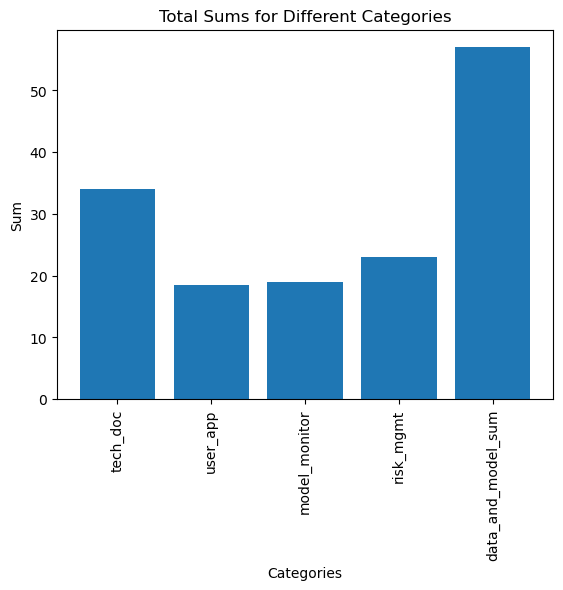

In [35]:
# Assuming you have the total sums calculated as before
totals = [total_tech_doc, total_user_app, total_model_monitor, total_risk_mgmt, total_data_and_model_sum]
categories = ['tech_doc', 'user_app', 'model_monitor', 'risk_mgmt', 'data_and_model_sum']

# Create a bar plot
plt.bar(categories, totals)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Sum')
plt.title('Total Sums for Different Categories')

# Show the plot
plt.show()